In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt
import skimage as ski

In [22]:
# Specific Colors from Image
###############################
# Red     -> red_plane - gray
# Green   -> green_plane - gray
# Blue    -> blue_plane - gray
# Cyan    -> gray - red_plane
# Magenta -> gray - green_plane
# Yellow  -> gray - blue_plane

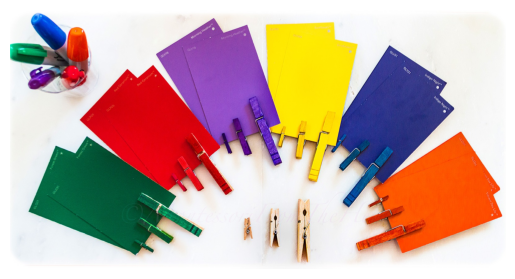

In [ ]:
img=plt.imread('colour.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


In [6]:
img.shape

(837, 1600, 3)

In [7]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
red_plane=img[:,:,-1].copy()
green_plane=img[:,:,-2].copy()
blue_plane=img[:,:,-3].copy()

In [8]:
red_color=cv2.subtract(red_plane,gray)
blue_color=cv2.subtract(blue_plane,gray)
green_color=cv2.subtract(green_plane,gray)
cyan_color=cv2.subtract(gray,red_plane)
yellow_color=cv2.subtract(gray,blue_plane)
magenta_color=cv2.subtract(gray,green_plane)

In [9]:
def imshow(im,title,type='', ):
    if type:
        plt.imshow(im,cmap=type)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')        

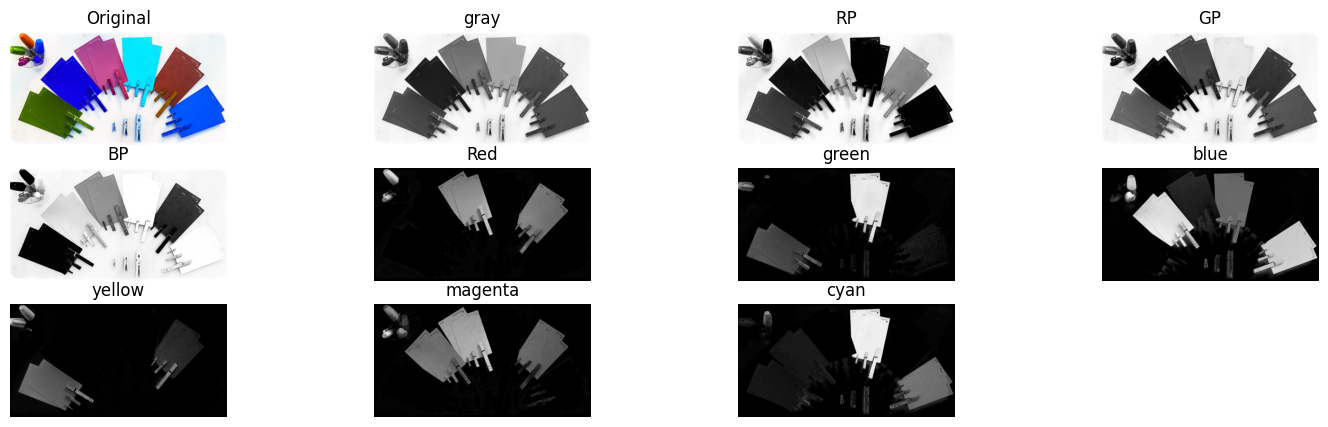

In [10]:
plt.figure(figsize=(18,5))
plt.subplot(3,4,1); imshow(img[:,:,::-1],'Original')
plt.subplot(3,4,2); imshow(gray,'gray','gray')
plt.subplot(3,4,3); imshow(red_plane,'RP','gray')
plt.subplot(3,4,4); imshow(green_plane,'GP','gray')
plt.subplot(3,4,5); imshow(blue_plane,'BP','gray')
plt.subplot(3,4,6); imshow(red_color,'Red','gray')
plt.subplot(3,4,7); imshow(green_color,'green','gray')
plt.subplot(3,4,8); imshow(blue_color,'blue','gray')
plt.subplot(3,4,9); imshow(yellow_color,'yellow','gray')
plt.subplot(3,4,10); imshow(magenta_color,'magenta','gray')
plt.subplot(3,4,11); imshow(cyan_color,'cyan','gray')
plt.show()

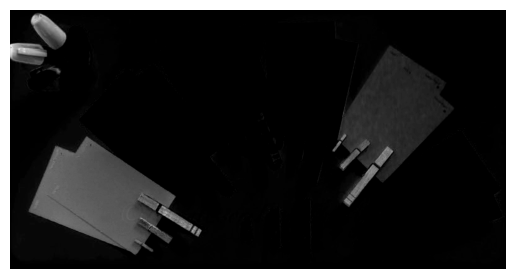

In [11]:
imshow(yellow_color,'','gray')

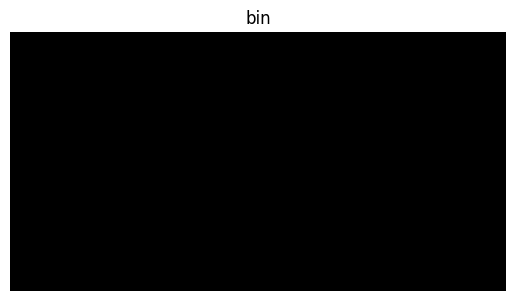

In [19]:
th, y_bw = cv2.threshold(yellow_color, 200, 255, cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [20]:
import skimage as ski

In [21]:
rp = ski.measure.regionprops(y_bw)
len(rp)

0

In [16]:
rp0 = rp[0]
y1,x1,y2,x2 = rp0.bbox   # y1,x1,y2,x2

IndexError: list index out of range

In [17]:
img_cropped = img[y1:y2, x1:x2,:].copy()
imshow(img_cropped[:,:,::-1],'cropped')

NameError: name 'y1' is not defined

In [18]:
img_copy = img.copy()
cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[0,0,255],thickness=5)
imshow(img_copy[:,:,::-1],'')

NameError: name 'x1' is not defined